# Introduction


   The United States has a well documented issue with gun violence. In the year 2023 alone 16,500 people have been killed over 1200 of them being teens and over 250 being children ages 0-11. These indiscriminate acts of violence are what our project seeks to understand.
    In order to tackle this problem we downloaded every instance of gun violence from 2014-2018 from a Kaggle dataset sourced from the gun violence. Each instance was grouped by its congressional district to get a look at the total numbers of the region as a whole. We then merged other data sets specifically, gun ownership rates in each state, population density, median income, and political voting history of each district to create linear regression models that look at past instances of gun violence and predict future areas at risk. 


# Research Question


The questions we are trying to tackle in our project are the following. How do gun ownership rates, median income, population density, and political affiliation of a congressional district affect gun violence? Is there a way to predict future areas at risk of elevated levels of gun violence given those factors?
    
In this project, we would like to find the correlation between those factors and the number of victims of gun violence in each congressional district. We aim  to train a multivariate regression to see how all of these factors affect the number of gun violence victims in each congressional district and in each state.


# Data Description

- The Gun Violence Dataframe was sourced from Kaggle. This is the link to the Kaggle post: https://www.kaggle.com/datasets/jameslko/gun-violence-data/data. In order to create this dataset the creator scraped 239677 instances of gun violence from the gun violence archive. This is the total number of reported acts of gun violence from 2014-2018. In order to check the validity of the scraping methods, we selected multiple random instances and checked them against the gun violence archive to make sure they matched. Each instance consists of 29 columns but the ones being used in this project are: n_killed (number of people killed),  n_injured (number of people injured), date (the date that the attack happened), state (the state where the attack occurred), and congressional_district (the congressional district of the state where the attack took place).


 - The State Gun Ownership was scraped from Wisevoter a website dedicated to providing voters information and tools that help them make more informed voting decisions. This data was fact-checked against multiple websites to make sure it is reliable. The main data point that this dataset gave us was the gun ownership rate and political leaning of every state which are labeled as “Gun Ownership Rate” and “Party”. This data includes every state and we are using 3 columns so the shape is 50 x 3. 


- The data frame labeled “congressional” was scraped from a US census report. The variables used in this report are the congressional district and its median income and population. These variables are labeled “District”, “median_income”, and “population”. This data frame was merged with the gun violence data frame to give more predictive variables for our model to use. This dataset goes through every congressional district so there are 435 rows and each one 3 columns so the shape is 435 x 3.  

- We also sourced population density data. This data was linked in an article from Bloomberg and was downloaded in a github that belonged to the Atlantic. The Atlantic is a reputable news source with a slight left leaning bias. The key terms that need to be explained from this dataset are the following:
    - Very low density: Percentage of each district's 2010 population living in Census tracts with fewer than 102 households per square mile
    - Low density: Population share in tracts with between 102 and 799 households per square mile
    - Medium density: Population share in tracts with between 800 and 2,213 households per square mile
    - High density: Population share in tracts with more than 2,213 households per square mile
    - r_percent: The share of voters who voted for a republican candidate in 2008.
    - district_binary_party: Is 1.0 if r_percent > .5 meaning that if mccain got more votes it is 1.0 and if Obama got more votes it is 0.

- We are loading in 6 dataframes. Merged_train, Merged_test, and Merged_data are the districts containing congressional district information. These are aggregations of the previous dataframes. Merged_train and Merged_test are many of the dataframes merged and then grouped by congressional district. The dataframes are split up by year. Merged_train contains all data before and including 2016 while Merged_test includes all incidents after 2016, Merged_data contains all of the data. The victims_killed were normalized to the overall share of the data for the train and test splits to ensure that predictions of victims in a district would not be skewed by the extra data. These data frame contains the following columns:
    - state : United States state that is being measured.
    - congressional_district: The congressional district that is being measured.
    - total killed: total number of people killed in that district over the time previously said
    - total injured: total number of people injured in that district over the time previously said
    - district_binary_party:  Binary variable that states whether or not the party voted for a Democrat (0) or Republican (1)
    - Very_low_density: percent of population that lives in a very low dense environment as defined above
    - Low_density: percent of population that lives in a low density environment 
    - Medium_density: percent of population that lives in a medium density environment
    - High_density: percent of population that lives in a high density environment
    - percent_r: percent of a population that voted for a republican candidate in 2008
    - median_income: the median income of a person in a congressional district in 2020. Measured in 1000s of dollars.
    - population: the population of a district
    - gun_ownership_rate: the gun ownership rate in the state of a congressional district
    - total victims: total number of victims injured + killed
    - total victims per capita: total number of victims injured + killed divided by the population
 - The remaining 3 dataframes are state_data_train, state_data_test, and state_data which contain data pertaining to the overall states. This dataset was formed by merging all of the original datasets and then grouping by only state. The columns in the dataset are the following: 
    - state: The state being measured
    - Gun Ownership Rate: Percent of the population that owns guns
    - population: The population of the state
    - Party: The general political leaning of the state
    - Party_Binary: 1 if the state voted republican 0 if they voted democrat
    - total victims: total number of victims injured + killed
    - total victims per capita: total number of victims injured + killed divided by the population
    



## Preregistered Statements

### Hypothesis 1


Alternative Hypothesis: 
Number of victims of gun violence is higher in congressional districts with a high percentage of the population living in dense environments and with lower median incomes. 


Null Hypothesis: 
	Population density and median income have no affect on the number of victims of gun violence in a congressional district. 
    
The thought behind this pregistered statement is that we want to figure out what is causing gun violence in the tens of thousands per year. We are trying to answer the questions: 
- Are people safer moving to rural communities? 
- Do urban cities have crime because of low income? 

Also, find out if social programs could potentially be effective in reducing the number of incidents of gun violence. 

### Hypothesis 2

Alternative Hypothesis: 
States with a higher gun ownership rate will have higher levels of gun violence. 


Null Hypothesis:
Gun ownership rate has no affect on the number of victims of gun violence per capita of a state. 

Our goal in this pre registered statement is to detail if  having more guns in a state will lead to more violence from said guns. Our hypothesis is that states with high gun ownership rates will have higher levels of gun violence and  the solution will therefore be to take those guns off the streets. If gun ownership is significant than there is a strong arguement for gun control as it could save thousands. 

In our project we are using python with all of the following packages. These are needed to create dataframes, clean the data, perform statistical operations on the data and plot them. 

In [20]:
import requests
from bs4 import BeautifulSoup
import duckdb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import regex as re
import statsmodels.api as sm

import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn import preprocessing

In [18]:
merged_train = pd.read_csv("merged_train.csv")
merged_test = pd.read_csv("merged_test.csv")
state_data_train = pd.read_csv("state_data_train.csv")
state_data_test = pd.read_csv("state_data_test.csv")
merged_data = pd.read_csv("merged_data_combined.csv")
state_data = pd.read_csv("state_data.csv")
graph_data = pd.read_csv("graph_data.csv")
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}



# Data Exploration and Analysis

The first part of the data exploration are plots that help visualize the variables and their relationship with each other. 

## Data Visualization

This is an interactive graph that shows how the total victims of gun violence have changed over time in each state.

In [21]:

fig = px.choropleth(graph_data, 
                   locations = 'code',
                   locationmode = 'USA-states', 
                   color = 'total_victims_population', 
                   animation_frame = 'year',
                   animation_group = 'code', 
                   title = "Total Victims Per Capita in Each State from 2013 to 2018", 
                   hover_name = 'state',
                   hover_data = {'total_victims_population'},
                   scope = 'usa')

fig.show()

This is a scatterplot that shows the relationship between percentage of a district that is labeled as each of the 4 densities and the toal victims per capita in said district.

Text(0, 0.5, 'Total Victims per capita')

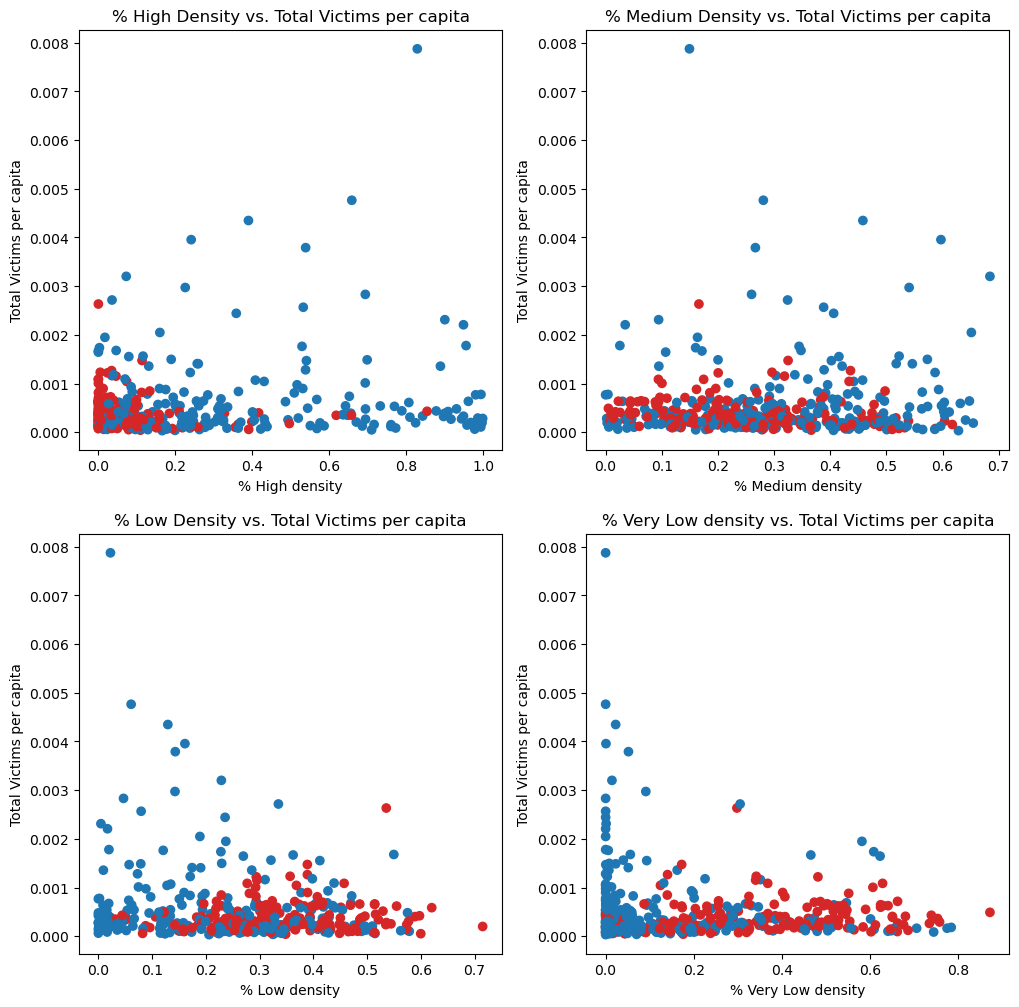

In [23]:
# Plotting Gun Ownership Rates with Victims Killed + Injured Per capita
a = {1:'tab:red', 0:'tab:blue'}
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0,0].scatter(merged_data['High_density'], 
            (merged_data['total_victims_per_capita']),\
            c = merged_data["district_binary_party"].map(a))
axes[0,0].set_title('% High Density vs. Total Victims per capita')
axes[0,0].set_xlabel("% High density")
axes[0,0].set_ylabel("Total Victims per capita")


axes[0,1].scatter(merged_data['Medium_density'], 
                (merged_data['total_victims_per_capita']),\
            c = merged_data["district_binary_party"].map(a))
axes[0,1].set_title('% Medium Density vs. Total Victims per capita')
axes[0,1].set_xlabel('% Medium density')
axes[0,1].set_ylabel("Total Victims per capita")


axes[1,0].scatter(merged_data['Low_density'], 
                (merged_data['total_victims_per_capita']),\
            c = merged_data["district_binary_party"].map(a))
axes[1,0].set_title('% Low Density vs. Total Victims per capita')
axes[1,0].set_xlabel('% Low density')
axes[1,0].set_ylabel("Total Victims per capita")

axes[1,1].scatter(merged_data['Very_low_density'], 
                (merged_data['total_victims_per_capita']),\
            c = merged_data["district_binary_party"].map(a))
axes[1,1].set_title('% Very Low density vs. Total Victims per capita')
axes[1,1].set_xlabel('% Very Low density')
axes[1,1].set_ylabel("Total Victims per capita")



From the scatterplots, following observations are apparent: Districts with a higher density lean much more democratic and total victims per capita is higher on average. There are also many outliers and districts that account for a much higher percentage of deaths and injuries than others. Overall it looks like there is a slight positive correlation between density and total victims per capita but more numbers to be run to determine if it is signficant. 

Next, we are plotting population of a district to the total number of victims. This is mainly to examine if we need to account for small population differences in our models.

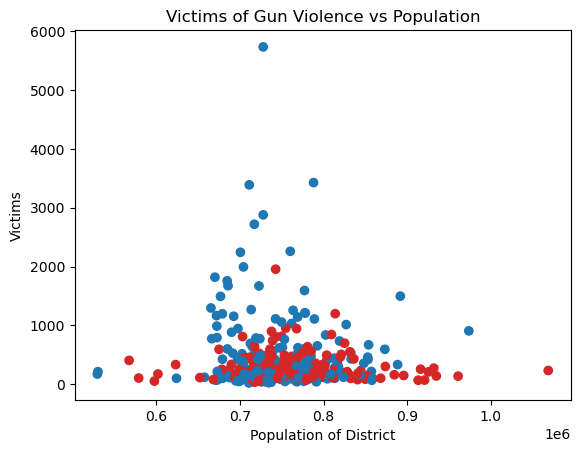

In [5]:
# Plotting Gun Deaths/Injuries to Population

plt.scatter(merged_data['population'], (merged_data['total_victims'])\
            ,c = merged_data["district_binary_party"].map(a));
plt.title('Victims of Gun Violence vs Population');
plt.xlabel('Population of District');
plt.ylabel('Victims');

This graph shows no real relationship between the population of the district and gun violence victims. Therefore population does not need to be included in our the regression models.

While all of the graphs have been showing democratic districts in blue and republican ones in red, the following graph examines the party difference more by using the percentage of people who voted for a republican candidate in the 2008 election. 

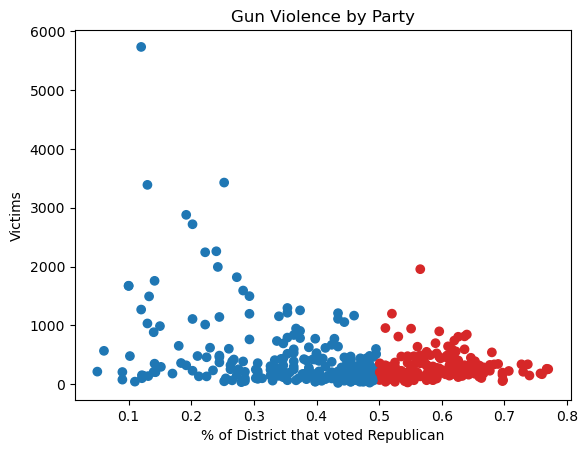

In [6]:
#Plotting Total Victims to Parties
plt.scatter(merged_data['percent_r'], \
            (merged_data['total_victims']), \
            c = merged_data["district_binary_party"].map(a));
plt.title('Gun Violence by Party');
plt.xlabel('% of District that voted Republican');
plt.ylabel('Victims');


From this graph, it looks on first glance that democratic districts cause gun violence. However, when examined with the other graphs, it is clear that there are many confouding variables that influence this.

The final exploratory graph we are looking at is median income compared to victims of gun violence. We predict that this is the graph that will show the highest correlation due to low income communities often being at higher risk of crime. 

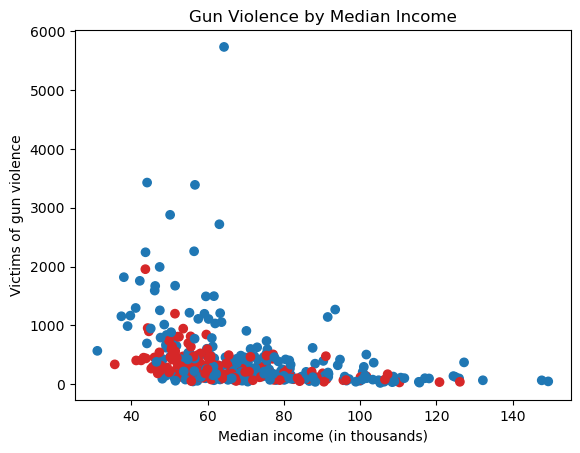

In [7]:
#Plotting Total Deaths to Parties
plt.scatter(merged_data['median_income'], \
            (merged_data['total_victims']), \
            c = merged_data["district_binary_party"].map(a));
plt.title('Gun Violence by Median Income');
plt.xlabel("Median income (in thousands)");
plt.ylabel('Victims of gun violence');


This graph looks to affirms our hypothesis that low income districts have higher rates of gun violence but we still need to do more research to see how strong this correlation is. 

## Key Summary Statistics

In [25]:
print("There were", merged_data["total_killed"].sum(), \
      "people killed from gun violence from 2014 to March of 2018")
print("There were", merged_data["total_injured"].sum(), \
      "people injured from gun violence from 2014 to March of 2018")

# Find the average per year and average per state
victims_per_year = round(merged_data["total_killed"].sum()/(4.25),2)
avg_victims_per_state = round(merged_data["total_killed"].sum()/50,2)
print("On average, there were ", victims_per_year, \
      "deaths from gun violence per year")
print("On average, there were", avg_victims_per_state, \
      "deaths from gun violence per state")
# Find the number killed in red states vs blue states
num_killed_R = state_data[state_data['Party']=='Republican']['total_killed'].sum()
num_killed_D = state_data[state_data['Party']=='Democrat']['total_killed'].sum()
print("There were ", num_killed_R, "people killed in Republican States and ",\
      num_killed_D, "people killed in Democrat States")

There were 54147.0 people killed from gun violence from 2014 to March of 2018
There were 108951.0 people injured from gun violence from 2014 to March of 2018
On average, there were  12740.47 deaths from gun violence per year
On average, there were 1082.94 deaths from gun violence per state
There were  28001.0 people killed in Republican States and  26146.0 people killed in Democrat States


## Regression Models and Analysis

There are multiple variables we are trying to measure and when making regression models it is important for the variables to not be highly correlated with each other. For this reason, we need to run a correlation matrix to exclude putting highly correlated variables together or in the model at all. 

In [26]:
#Correlation Matrix for Data Frame
cols = ['gun_ownership_rate', "Very_low_density","Low_density", \
        "Medium_density" ,"High_density", "percent_r", \
        'median_income']
merged_data[cols].corr()

,gun_ownership_rate,Very_low_density,Low_density,Medium_density,High_density,percent_r,median_income
gun_ownership_rate,1.000000,0.519007,0.252413,-0.084356,-0.508326,0.446894,-0.477498
Very_low_density,0.519007,1.000000,0.299907,-0.572390,-0.634214,0.579564,-0.410703
Low_density,0.252413,0.299907,1.000000,-0.036713,-0.769335,0.548816,-0.079925
Medium_density,-0.084356,-0.572390,-0.036713,1.000000,-0.109567,-0.096123,0.220809
High_density,-0.508326,-0.634214,-0.769335,-0.109567,1.000000,-0.712910,0.245215
percent_r,0.446894,0.579564,0.548816,-0.096123,-0.712910,1.000000,-0.171022
median_income,-0.477498,-0.410703,-0.079925,0.220809,0.245215,-0.171022,1.000000


This correlation matrix informs our hypothesis models as we can see that gun ownership rate of a stateis highly correlated with the percent republican of a district. This means we should not these two together as republican states clearly have more guns and this would cause colinearity. We also see that percent_r (percent of a district that votes republican) is highly correlated with district density. More densly packed districts are far more likely to vote democrat so including both of these factors in the models would also cause colinearity. While testing very low density districts with median income may result in a lot of collinearity due to a correlation of -.4, it would be interesting to see if low density would still have an effect all else equal. The rest of the density values do not have a correlation of over .3 so they are safe to put in a model with median income. Percent republican is also not highly correlated with median income so that too can go in a model to predict total victims killed. 

## Hypothesis 1: Median Income and political leaning can be used to create a model about the number of victims of gun violence in a given congressional district.

### Hypothesis 1 Testing:

For the first hypothesis we are measuring the percent of a district that voted for Mccain over Obama and the median income of that district against the total number of victims of gun violence in a given year. The train split is data from 2014-2016 and to get y_train numbers of total victims per year we divided the total victims by 3. For y_test, the data goes from 01/01/2017 - 3/31/2018 which is 1.25 years. Dividing the y_test numbers by 1.25 will give the approximate victims per year. We also decided to run a linear-log model because when running a linear-linear model, we noticed heteroskedasticity in the residuals. 

median_income: -0.027101165
percent_r: -1.788247469
intercept:  6.703586468570822
Train RMSE: 0.723459024
Test RMSE: 0.760410311
                            OLS Regression Results                            
Dep. Variable:          total_victims   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     114.6
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.95e-40
Time:                        22:13:34   Log-Likelihood:                -483.38
No. Observations:                 423   AIC:                             972.8
Df Residuals:                     420   BIC:                             984.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]

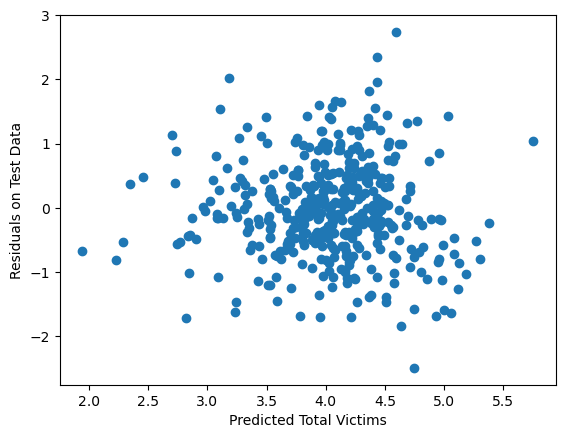

In [10]:
#Multilinear Regression on median income and district party binary
# Train Test Split
X_train = merged_train.drop(columns = ['total_victims'])
y_train = np.log(merged_train['total_victims'] / (3))
X_test = merged_test.drop(columns = ['total_victims'])
y_test = np.log(merged_test['total_victims'] / (1.25))

#Running Linear Regression
cols = ["median_income", "percent_r"]
model = LinearRegression().fit(X_train[cols], y_train)
for var, coef in zip(cols, model.coef_):
    print(f'{var}: %.9f' %coef)
print("intercept: ", model.intercept_)

#Residuals for Test Data
train_pred = model.predict(X_train[cols])
test_pred = model.predict(X_test[cols])
test_residuals = test_pred - y_test
plt.scatter(test_pred, test_residuals, marker ='o')
plt.xlabel("Predicted Total Victims")
plt.ylabel("Residuals on Test Data")

#RMSE for both Train and Test data
Train_RMSE = np.sqrt(np.sum((y_train-\
                             train_pred)**2)/len(train_pred))
Test_RMSE = np.sqrt(np.sum((y_test-\
                             test_pred)**2)/len(test_pred))

print("Train RMSE: %.9f" %Train_RMSE)
print("Test RMSE: %.9f" %Test_RMSE)

#OLS metrics for Test data
x = X_test[cols]
y = y_test
x = sm.add_constant(x)
stats = sm.OLS(y.astype(float), x.astype(float))
results = stats.fit()
print(results.summary())




The graph is a residual plot of our test data for hypothesis one. The graph shows a very random looking dispersion of points which signals that there is not underlying transformation needed. Additionally, we managed to get out P values to less than the 0.05 threshold and show that our variables are significant.

The model suggests that for every 1 dollar increase in median income, one can expect the number of total victims to be 3% less. For every percentage increase in voting for McCain, we would expect the district to have a 86% decrease of total victims to gun violence. The Test and Train RMSE are very low and close to each other which indicated our model is not overfitted and captures an accurate representation of most of the data.

## Hypothesis 2: Population density can also be used to create a model that will predict the number of victims of gun violence in a given congressional district.

### Hypothesis 2 Testing: 

High_density: 0.825646891
median_income: -0.027570189
intercept:  5.747183040841418
Train RMSE: 0.739146804
Test RMSE: 0.779550073
                            OLS Regression Results                            
Dep. Variable:          total_victims   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.318
Method:                 Least Squares   F-statistic:                     99.24
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           5.05e-36
Time:                        22:13:34   Log-Likelihood:                -493.62
No. Observations:                 423   AIC:                             993.2
Df Residuals:                     420   BIC:                             1005.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.97

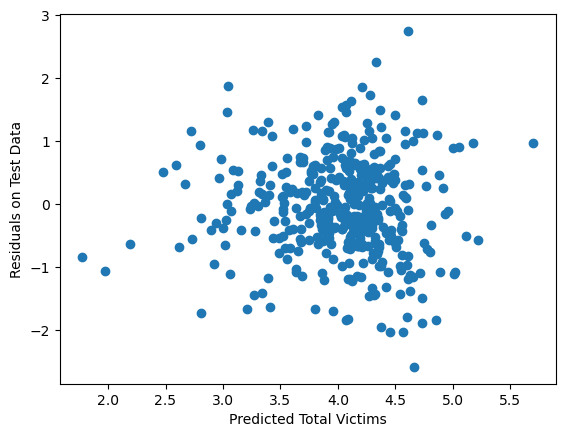

In [11]:
#Multilinear Regression on median income and High-Density Percentage
# Train Test Split
X_train = merged_train.drop(columns = ['total_victims'])
y_train = merged_train['total_victims'] / (3)
X_test = merged_test.drop(columns = ['total_victims'])
y_test = merged_test['total_victims'] / (1.25)
y_train = np.log(y_train)
y_test = np.log(y_test)

#Running Linear Regression
cols = ["High_density", "median_income"]
model = LinearRegression().fit(X_train[cols], y_train)
for var, coef in zip(cols, model.coef_):
    print(f'{var}: %.9f' %coef)
print("intercept: ", model.intercept_)


#Residuals for Test Data
train_pred = model.predict(X_train[cols])
test_pred = model.predict(X_test[cols])
test_residuals = test_pred - y_test
plt.scatter(test_pred, test_residuals, marker ='o')
plt.xlabel("Predicted Total Victims")
plt.ylabel("Residuals on Test Data")

#RMSE for both Train and Test data
Train_RMSE = np.sqrt(np.sum((y_train-\
                             train_pred)**2)/len(train_pred))
Test_RMSE = np.sqrt(np.sum((y_test-\
                             test_pred)**2)/len(test_pred))

print("Train RMSE: %.9f" %Train_RMSE)
print("Test RMSE: %.9f" %Test_RMSE)

#OLS metrics for Test data
x = X_test[cols]
y = y_test
x = sm.add_constant(x)
stats = sm.OLS(y.astype(float), x.astype(float))
results = stats.fit()
print(results.summary())

The graph is a residual plot of our test data for hypothesis two with high-density districts. The graph appears to be random and not indicative of a transformation being needed. Additionally, we managed to get our P values to less than the 0.05 threshold and show that our variables are significant. 

The model suggests that for every 1 dollar increase in median income, one can expect the number of total victims to be 3% less, just like in the last model. For every percentage increase in people living in highly dense areas, we would expect the district to have a 100% increase in total victims of gun violence. Our RMSE for our hypothesis is very low and around the same for both the train and test data.

Medium_density: 0.732923871
median_income: -0.026049190
intercept:  5.609162998706932
Test RMSE: 0.784222835
                            OLS Regression Results                            
Dep. Variable:          total_victims   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     96.20
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           4.04e-35
Time:                        22:13:35   Log-Likelihood:                -495.71
No. Observations:                 423   AIC:                             997.4
Df Residuals:                     420   BIC:                             1010.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
------------------

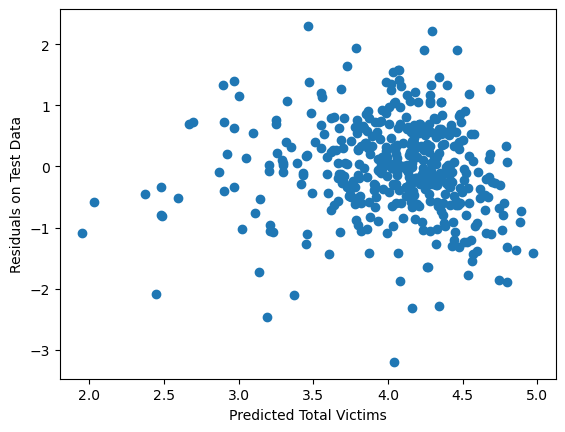

In [12]:
#Multilinear Regression on median income and Medium Density Percentage
# Train Test Split
X_train = merged_train.drop(columns = ['total_victims'])
y_train = merged_train['total_victims'] / (3)
X_test = merged_test.drop(columns = ['total_victims'])
y_test = merged_test['total_victims'] / (1.25)
y_train = np.log(y_train)
y_test = np.log(y_test)

#Running Linear Regression
cols = ["Medium_density", "median_income"]
model = LinearRegression().fit(X_train[cols], y_train)
for var, coef in zip(cols, model.coef_):
    print(f'{var}: %.9f' %coef)
print("intercept: ", model.intercept_)


#Residuals for Test Data
test_pred = model.predict(X_test[cols])
test_residuals = test_pred - y_test
plt.scatter(test_pred, test_residuals, marker ='o')
plt.xlabel("Predicted Total Victims")
plt.ylabel("Residuals on Test Data")

#RMSE for Test data

Test_RMSE = np.sqrt(np.sum((y_test-\
                             test_pred)**2)/len(test_pred))

print("Test RMSE: %.9f" %Test_RMSE)

#OLS metrics for Test data
x = X_test[cols]
y = y_test
x = sm.add_constant(x)
stats = sm.OLS(y.astype(float), x.astype(float))
results = stats.fit()
print(results.summary())

This model provides a similar story to the ones above it with an even spread of residuals, low P values, and low RMSE values. One thing to notice is the consistency in the coefficient for medium income despite changing the density variables. This indicates that density is a larger predictor in total victims than median income as it does not change values much when we change density. 

The model predicts the same 3% decrease as before from median income while a one percent increase in medium density leading to 186% increase in gun violence.

Low_density: -0.973827391
median_income: -0.025288957
intercept:  6.033574659762761
Test RMSE: 0.790364572
                            OLS Regression Results                            
Dep. Variable:          total_victims   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     90.41
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           2.22e-33
Time:                        22:13:35   Log-Likelihood:                -499.74
No. Observations:                 423   AIC:                             1005.
Df Residuals:                     420   BIC:                             1018.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------

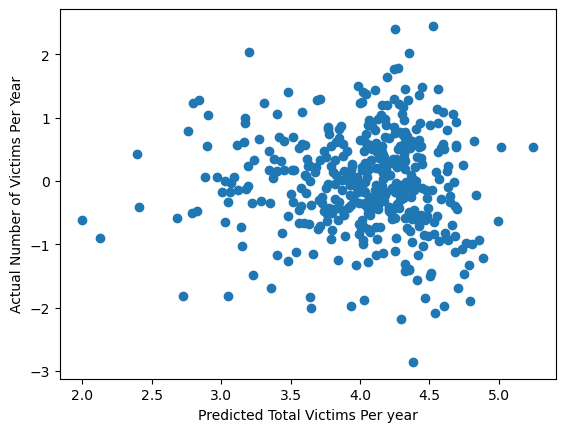

In [13]:
#Multilinear Regression on Low Income Density
X_train = merged_train.drop(columns = ['total_victims'])
y_train = merged_train['total_victims'] / (3)
X_test = merged_test.drop(columns = ['total_victims'])
y_test = merged_test['total_victims'] / (1.25)
y_train = np.log(y_train)
y_test = np.log(y_test)
#Running Linear Regression
cols = ["Low_density", "median_income"]
model = LinearRegression().fit(X_train[cols], y_train)
for var, coef in zip(cols, model.coef_):
    print(f'{var}: %.9f' %coef)
print("intercept: ", model.intercept_)


#Residuals for Test Data
test_pred = model.predict(X_test[cols])
test_residuals = test_pred - y_test
plt.scatter(test_pred, test_residuals, marker ='o')
plt.xlabel("Predicted Total Victims Per year")
plt.ylabel("Actual Number of Victims Per Year")

#RMSE for Test data

Test_RMSE = np.sqrt(np.sum((y_test-\
                             test_pred)**2)/len(test_pred))

print("Test RMSE: %.9f" %Test_RMSE)

#OLS metrics for Test data
x = X_test[cols]
y = y_test
x = sm.add_constant(x)
stats = sm.OLS(y.astype(float), x.astype(float))
results = stats.fit()
print(results.summary())

This model is the same story with slightly differing coefficients. The model predicts that for every one percent increase in the number of people in low density areas there is an associated 56% decrease in the number of total victims for the county. The low density variable has a slightly higher p value of 0.001 but that is still much under the 0.05 threshold.

Very_low_density: -1.341454141
median_income: -0.031043530
intercept:  6.46718137290257
Test RMSE: 0.750576419
                            OLS Regression Results                            
Dep. Variable:          total_victims   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     123.1
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           8.59e-43
Time:                        22:13:35   Log-Likelihood:                -477.92
No. Observations:                 423   AIC:                             961.8
Df Residuals:                     420   BIC:                             974.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------

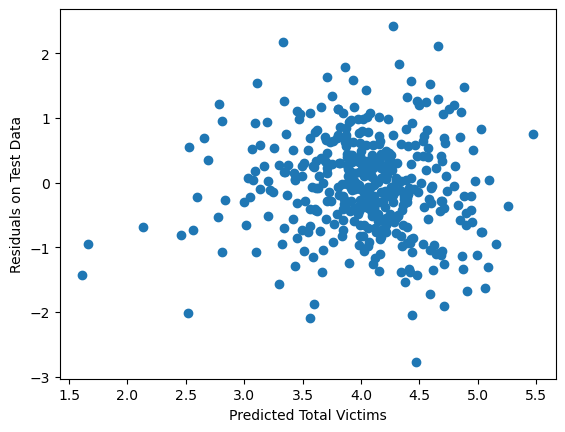

In [14]:
#Multilinear Regression on Very Low Density percentage
# Train Test Split
X_train = merged_train.drop(columns = ['total_victims'])
y_train = merged_train['total_victims'] / (3)
X_test = merged_test.drop(columns = ['total_victims'])
y_test = merged_test['total_victims'] / (1.25)
y_train = np.log(y_train)
y_test = np.log(y_test)
#Running Linear Regression
cols = ["Very_low_density", "median_income"]
model = LinearRegression().fit(X_train[cols], y_train)
for var, coef in zip(cols, model.coef_):
    print(f'{var}: %.9f' %coef)
print("intercept: ", model.intercept_)


#Residuals for Test Data
test_pred = model.predict(X_test[cols])
test_residuals = test_pred - y_test
plt.scatter(test_pred, test_residuals, marker ='o')
plt.xlabel("Predicted Total Victims")
plt.ylabel("Residuals on Test Data")

#RMSE forTest data

Test_RMSE = np.sqrt(np.sum((y_test-\
                             test_pred)**2)/len(test_pred))

print("Test RMSE: %.9f" %Test_RMSE)

#OLS metrics for Test data
x = X_test[cols]
y = y_test
x = sm.add_constant(x)
stats = sm.OLS(y.astype(float), x.astype(float))
results = stats.fit()
print(results.summary())

The model on very low density and median income has a slightly higher median income coefficient with a one dollar increase in median income leading to a 3.3% decrease in the predicted total victims. A one percent increase in people living in very low density areas leads to a 75% decrease in predicted total victims. 

## Hypothesis 3: Gun Ownership Rates in a state can be used to predict the number of victims per capita of gun violence in a given state. 

### Hypothesis 3 Testing:

The first thing to do when trying to understand this hypothesis is to graph total victims per capita with gun violence. We are using victims per capita because otherwise this data would be skewed in the favor of states with fewer people.

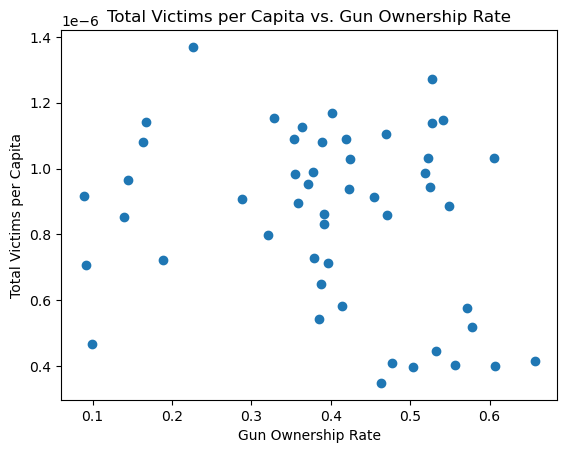

In [15]:
plt.scatter(state_data["gun_ownership_rate"], state_data["total_victims_per_capita"]);
plt.title("Total Victims per Capita vs. Gun Ownership Rate");
plt.xlabel("Gun Ownership Rate");
plt.ylabel("Total Victims per Capita");


At first glance, this data looks like there may be a slight positive correlation but it is not strong. More information is needed to tell if there is a significant correlation.

                               OLS Regression Results                               
Dep. Variable:     total_victims_per_capita   R-squared:                       0.019
Model:                                  OLS   Adj. R-squared:                 -0.002
Method:                       Least Squares   F-statistic:                    0.9102
Date:                      Mon, 04 Dec 2023   Prob (F-statistic):              0.345
Time:                              22:13:36   Log-Likelihood:                 681.93
No. Observations:                        50   AIC:                            -1360.
Df Residuals:                            48   BIC:                            -1356.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

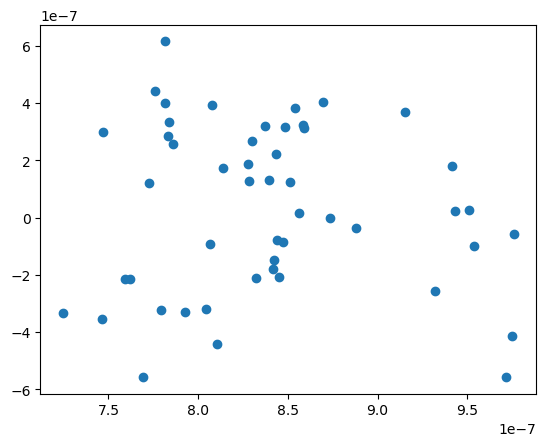

In [16]:
X_train = state_data_train[["gun_ownership_rate"]]
y_train = state_data_train[["total_victims_per_capita"]] 
X_test = state_data_test[["gun_ownership_rate"]]
y_test = state_data_test[["total_victims_per_capita"]]

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(y_pred, y_test-y_pred)


x = X_test
y = y_test
x= sm.add_constant(x) 
model_sm = sm.OLS(y, x)
results = model_sm.fit()
print(results.summary())


mse = mean_squared_error(y_test, y_pred)
print(f"The MSE is: {mse}")

This data  says the opposite of what we had initially predicted, even though it is not significant with a p-value of .345 (well above the .05 threshold). This model claims that for every 1% increase in states, gun ownership rate victims per capita in a state will decrease by .0000000275. This is likely due to the confounding variables that come with the gun ownership rate. Even though there are possible confoundings that would be interesting to research, we will still fail to reject the null hypothesis.  

# Conclusion, Limitations, and Future Research

## Conclusion

Overall our findings were clear areas that have lower median incomes and are more densely packed have on average more gun violence. While we also found that a district voting for democrats makes it more likely to have higher levels of crime, this is almost certainly due to the collinearity between party and density. This highlights how in order to reduce crime, we need to work on fixing income inequality. This points to the other finding we had that gun ownership rate is not neccesarily correlated with victims per capita. While 65% of people having access to firearms in a given state is absurd, our findings indicate that to target gun violence most effectively social programs are the best way to do so. While this may not show results in the short-term, building up communities will inevitably lead to less gun violence and crime as a whole.

## Data Limitations

There are multiple limitations in this project that could cloud these results. One glaring hole is that there is often a mass amount of income disparity within districts. Just because a district has a higher median income does not mean that there are not certain subgroups of that district that are lower in income and therefore have more gun violence. Since districts are so big there is often a mix of different environments so seperating them would be best if possible. If we were able to get the specific zipcode of all of these attacks that would be more useful than the district but this was much harder to obtain.

This data only represents a little over 4 years of gun violence. While it is a comprehensive list of everything that happened in that time, it would have been interesting to see how gun violence numbers have changed over time. 

Finally, all of our data points are highly confounding. While we did try to control for this by putting variables together that had low collinearity, we inevitably still ran into this problem. For example, if we could measure gun violence in places with  similar population density and median incomes but different gun ownership rates that would be very interesting.

## Future Research Opportunities

As previously mentioned, researching more specific areas would be a dataset that would be very informative as it could drastically change the coefficients of our variables such as median income. Other variables such as access to mental health resources, high school graduation rate, congressional gun ownership rates, and percent of guns that are unregistered (if that stat exists) could all be interesting areas of study in the future. Additionally, looking into the specific perpetrators and seeing if the demographics differ by region would be informative too.

# Appendix

1. Please look in our GitHub repository for the gathering, cleaning, and merging of this data. It can be found in the file "gathering_cleaning_merging.ipynb". It can be found here: https://github.com/Aaradhyaa717/Gun-Violence-in-United-States/blob/main/gathering_cleaning_merging.ipynb
2. The Total Gun Violence data frame is on this Google Drive link: https://drive.google.com/file/d/1u6QPo0U0LB1UqsPpdRETFDnd2iZJbzLs/view?usp=sharing
3. The data on population density and voting history can be found at this link: https://drive.google.com/file/d/1Hd04dKWSQruh7iR8scxJhChNOf8XNBgH/view?usp=sharing
4. The snapshot of the interactive graph of the total victims of gun violence can be found at this link:https://github.com/Aaradhyaa717/Gun-Violence-in-United-States/blob/main/total%20victims%20per%20capita%20in%20each%20state.png


